In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
# License: MIT

In [3]:
%matplotlib inline

## Packages

In [4]:
import numpy as np
import scipy as scipy
import scipy.linalg as linalg

import matplotlib.pyplot as plt

import warnings

# Computational Activity 1

## Part one: Velocity function 

Consider the velocity field

$$\mathbf{u} = \frac{x\hat{\mathbf{j}}-y\hat{\mathbf{i}}}{x^2+y^2}$$

This can also be written as $\mathbf{u}=\begin{bmatrix} \frac{-y}{x^2+y^2} \\ \frac{x}{x^2+y^2}\end{bmatrix}$

In [5]:
def velocity(x,y):
    u = -y/(x**2+y**2)
    v = x/(x**2+y**2)
    U = np.array([u,v])
    return U

In [6]:
velocity(0,1)

array([-1.,  0.])

## Part two: Gridded domain

In [321]:
# set discretization for grid
x = np.linspace(-10,10,20)
y = np.linspace(-10,10,20)

# calculate paired points
X,Y = np.meshgrid(x,y)

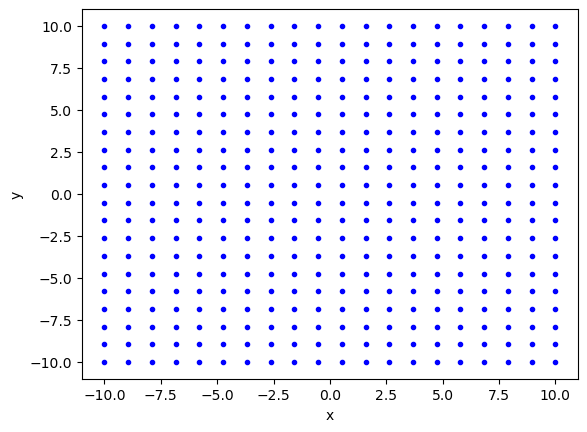

In [322]:
# plot resulting mesh as individual points
plt.plot(X,Y,'b.');
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Part three: Streak lines and streamlines

In [323]:
# calculate velocity at each point in mesh
U = velocity(X,Y)

In [324]:
# extract velocity components
u = U[0,:,:]
v = U[1,:,:]

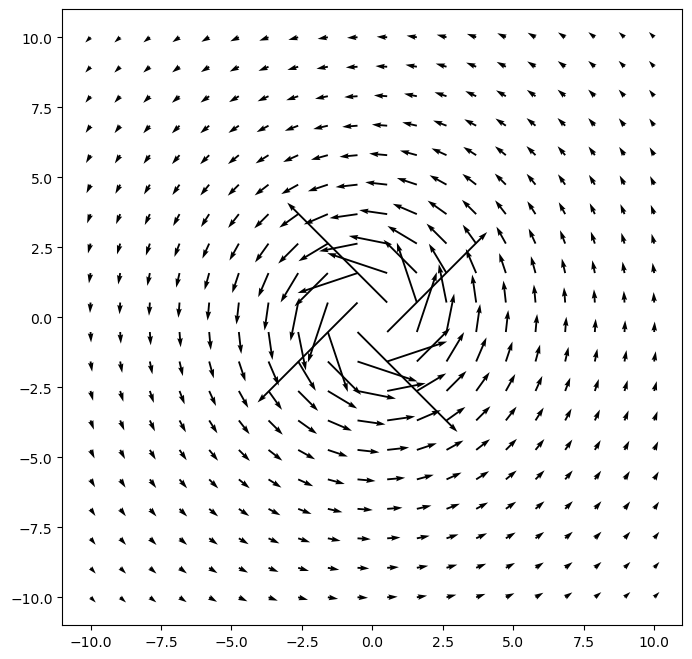

In [325]:
# plot streak lines
fig = plt.figure(figsize=(8,8));
plt.quiver(X,Y,u,v);

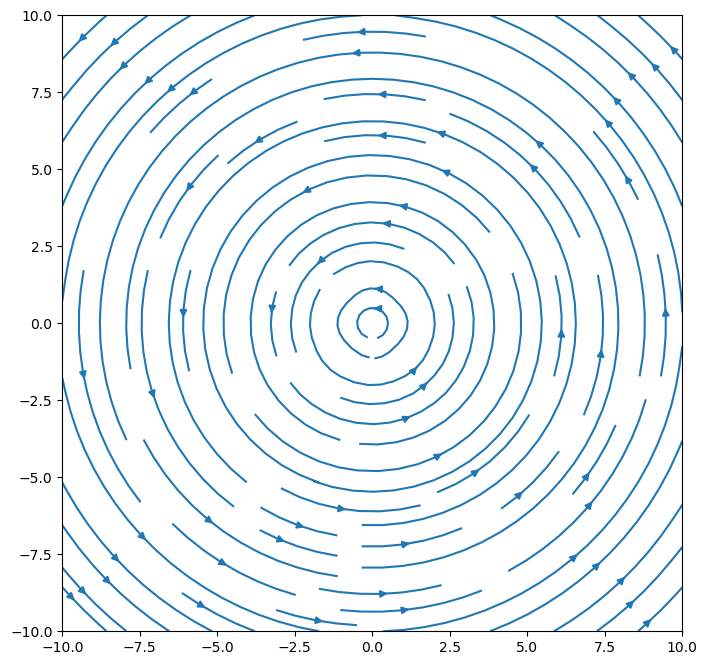

In [326]:
# plot streamlines
fig = plt.figure(figsize=(8,8))
plt.streamplot(X,Y,u,v);

## Part four: Approximating acceleration

The acceleration for a 2D velocity field with no time dependence is defined as

$$ \mathbf{a} := \frac{\mathrm{D}\mathbf{u}}{\mathrm{D}t} = \begin{bmatrix} u\frac{\partial u}{\partial x} + v\frac{\partial u}{\partial y} \\ u\frac{\partial v}{\partial x} + v\frac{\partial v}{\partial y} \end{bmatrix}. $$

For our system this becomes

$$ \mathbf{a} = \begin{bmatrix} \frac{-x}{(x^2+y^2)^2} \\  \frac{-y}{(x^2+y^2)^2} \end{bmatrix}. $$

In [327]:
# define function to estimate acceleration using finite differences
def accel_approx(x,y,h):
    xp = x + h
    xm = x - h
    dUdx = (velocity(xp,y) - velocity(xm,y)) / (2*h)
    yp = y + h
    ym = y - h
    dUdy = (velocity(x,yp) - velocity(x,ym)) / (2*h)

    U = velocity(x,y)
    size = np.shape(U)
    u = U[0,:,:]
    v = U[1,:,:]
    a = np.empty(size)
    a[0,:,:] = u*dUdx[0,:,:] + v*dUdy[0,:,:]
    a[1,:,:] = u*dUdx[1,:,:] + v*dUdy[1,:,:]
    
    return a

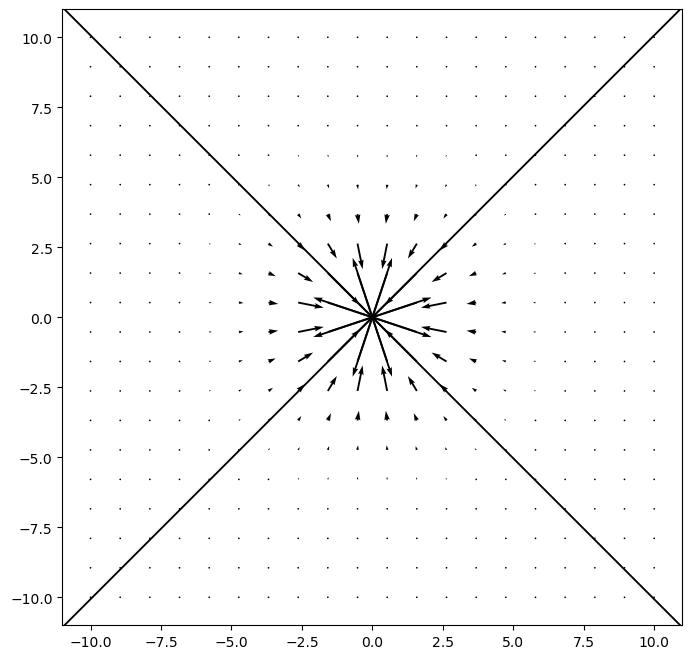

In [328]:
# approximate acceleration
a_approx = accel_approx(X,Y,1e-6)

ax = a_approx[0,:,:]
ay = a_approx[1,:,:]

# plot acceleration vector at each point
fig = plt.figure(figsize=(8,8));
plt.quiver(X,Y,ax,ay);

In [329]:
# define function for analytical acceleration
def accel_exact(x,y):
    ax = -x/(x**2+y**2)**2
    ay = -y/(x**2+y**2)**2

    a = np.array([ax,ay])
    return a

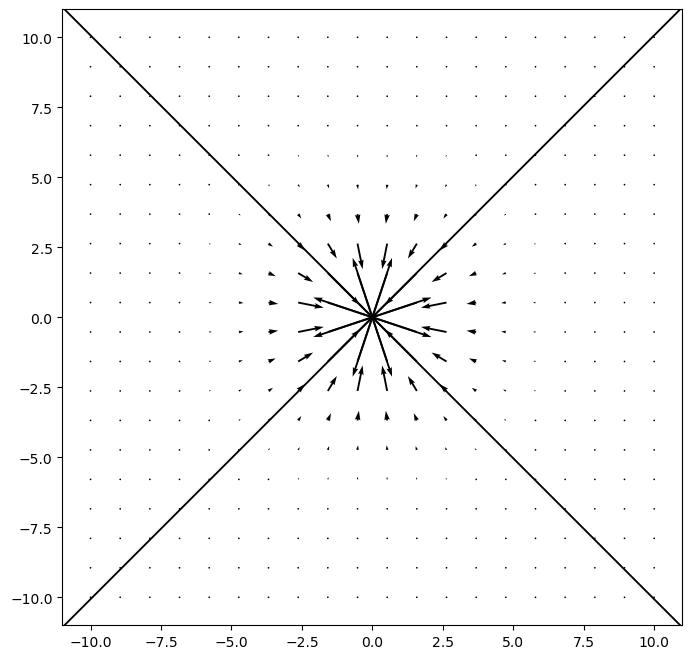

In [330]:
# calculate exact acceleration
a_exact = accel_exact(X,Y)

ax = a_exact[0,:,:]
ay = a_exact[1,:,:]

# plot acceleration vector at each point
fig = plt.figure(figsize=(8,8));
plt.quiver(X,Y,ax,ay);

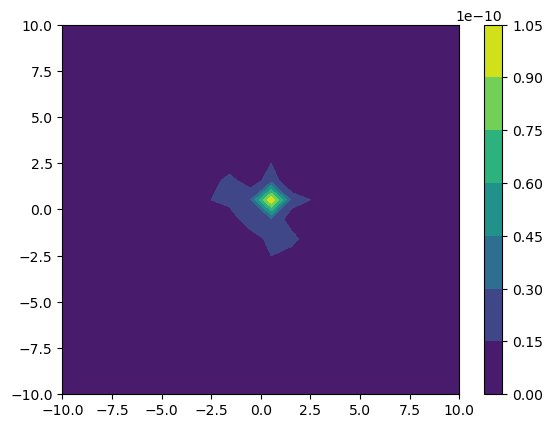

In [332]:
# calculate error
error = linalg.norm(a_exact - a_approx,axis=0)

plt.contourf(X,Y,error)
plt.colorbar()